### **Exp-6 Agglomerative  Clustering**

## <span style="color : green"> Agglomerative Clustering </span>

# <center> Table of Contents </center>

1. Plot the dendogram for the dataset using an Linkage function and an distance metrics
1. Train an agglomerative model using different linkage functions and distance metrics and 
1. Analyse the dataset using scatter plot 
1. Evaluate the clustering approach using Silhoutter Score, Davies bauldin score and mutual information

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
Kasol = pd.read_csv("Kasol.csv")
Kasol

,Tmin,Rainfall,RH,Solar,Wind,Tmax,Discharge
0,3.3,0.0,0.47,7.54,2.59,11.1,133.50
1,4.4,0.0,0.24,13.55,3.05,8.9,122.00
2,4.4,0.0,0.33,13.37,3.34,15.6,114.80
3,4.4,0.0,0.30,9.45,3.07,16.7,114.50
4,5.6,0.0,0.21,13.60,3.89,16.7,113.90
...,...,...,...,...,...,...,...
7300,5.2,0.0,0.50,15.20,4.69,19.6,123.90
7301,5.7,0.0,0.40,11.00,3.94,19.4,122.79
7302,6.0,0.0,0.50,15.40,3.61,19.1,123.90
7303,6.0,0.0,0.50,12.90,2.87,19.5,124.43


In [ ]:
Kasol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmin       7305 non-null   float64
 1   Rainfall   7291 non-null   float64
 2   RH         7305 non-null   float64
 3   Solar      7305 non-null   float64
 4   Wind       7305 non-null   float64
 5   Tmax       7305 non-null   float64
 6   Discharge  7305 non-null   float64
dtypes: float64(7)
memory usage: 399.6 KB


In [ ]:
Kasol.isnull().sum()

Tmin          0
Rainfall     14
RH            0
Solar         0
Wind          0
Tmax          0
Discharge     0
dtype: int64

In [ ]:
Kasol["Rainfall"].fillna(value=Kasol["Rainfall"].mean(), inplace=True) 

In [ ]:
Kasol.isnull().sum()

Tmin         0
Rainfall     0
RH           0
Solar        0
Wind         0
Tmax         0
Discharge    0
dtype: int64

In [ ]:
X = Kasol.drop("Discharge", axis = 1)
X

,Tmin,Rainfall,RH,Solar,Wind,Tmax
0,3.3,0.0,0.47,7.54,2.59,11.1
1,4.4,0.0,0.24,13.55,3.05,8.9
2,4.4,0.0,0.33,13.37,3.34,15.6
3,4.4,0.0,0.30,9.45,3.07,16.7
4,5.6,0.0,0.21,13.60,3.89,16.7
...,...,...,...,...,...,...
7300,5.2,0.0,0.50,15.20,4.69,19.6
7301,5.7,0.0,0.40,11.00,3.94,19.4
7302,6.0,0.0,0.50,15.40,3.61,19.1
7303,6.0,0.0,0.50,12.90,2.87,19.5


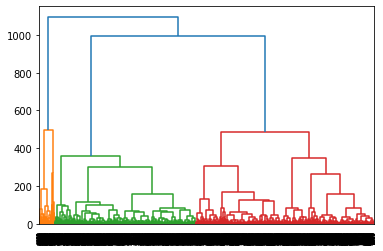

In [ ]:
'''Plot the dendrogram'''
dendrogram = sch.dendrogram(sch.linkage(X, method='ward', metric='euclidean'))
plt.show()

In [ ]:
'''Implement agglomerative clustering algorithms to cluster the given data for
different distance metrics (Euclidean, Manhattan, Cosine, L1, L2) and linkage
functions (single, complete, average, wards)'''
Agglo = AgglomerativeClustering(n_clusters = 3, affinity = 'l2', linkage = 'average') #num of clusters is 3,affinity-measures the similarity of two clusters(min),average linkage.
Agglo.fit(X)
labels = Agglo.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
x1 = list(range(1,7306))
df1 = pd.DataFrame(Agglo.labels_,columns = ['Cluster'])
df1.insert(0, 'No', x1)
df1

,No,Cluster
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
7300,7301,1
7301,7302,1
7302,7303,1
7303,7304,1


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


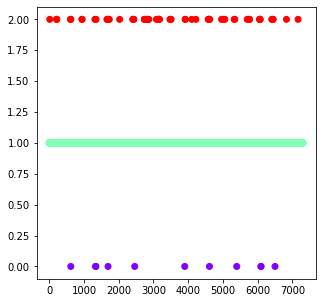

In [ ]:
plt.figure(figsize = (5,5))
plt.scatter(df1['No'], df1['Cluster'], c =Agglo.fit_predict(X), cmap = 'rainbow') #fit and return the result of each clusters
plt.show()

In [ ]:
score = silhouette_score(X, Agglo.labels_, metric='euclidean')
score


0.7367830852770201

In [ ]:
score = davies_bouldin_score(X, Agglo.labels_)
score


0.4898949131430497

In [ ]:
'''Implement agglomerative clustering algorithms to cluster the given data for
different distance metrics (Euclidean, Manhattan, Cosine, L1, L2) and linkage
functions (single, complete, average, wards)'''
Agglo = AgglomerativeClustering(n_clusters = 3, affinity = 'l1', linkage = 'single')
Agglo.fit(X)
labels = Agglo.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
x2 = list(range(1,7306))
df2 = pd.DataFrame(Agglo.labels_,columns = ['Cluster'])
df2.insert(0, 'No', x2)
df2

,No,Cluster
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
7300,7301,0
7301,7302,0
7302,7303,0
7303,7304,0


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


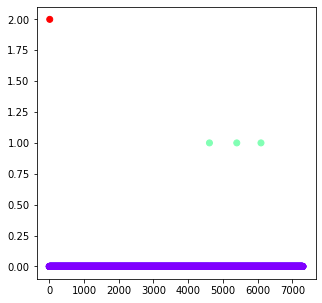

In [ ]:
plt.figure(figsize = (5,5))
plt.scatter(df2['No'], df2['Cluster'], c =Agglo.fit_predict(X), cmap = 'rainbow')
plt.show()

In [ ]:
score = silhouette_score(X, Agglo.labels_, metric='manhattan')
score


0.7149903084938878

**TWO ATTRIBUTES**

In [ ]:
Kasol1 = pd.read_csv("Kasol.csv")
Kasol1

,Tmin,Rainfall,RH,Solar,Wind,Tmax,Discharge
0,3.3,0.0,0.47,7.54,2.59,11.1,133.50
1,4.4,0.0,0.24,13.55,3.05,8.9,122.00
2,4.4,0.0,0.33,13.37,3.34,15.6,114.80
3,4.4,0.0,0.30,9.45,3.07,16.7,114.50
4,5.6,0.0,0.21,13.60,3.89,16.7,113.90
...,...,...,...,...,...,...,...
7300,5.2,0.0,0.50,15.20,4.69,19.6,123.90
7301,5.7,0.0,0.40,11.00,3.94,19.4,122.79
7302,6.0,0.0,0.50,15.40,3.61,19.1,123.90
7303,6.0,0.0,0.50,12.90,2.87,19.5,124.43


In [ ]:
Kasol1.isnull().sum()

Tmin         0
Rainfall     0
RH           0
Solar        0
Wind         0
Tmax         0
Discharge    0
dtype: int64

In [ ]:
Kasol1["Rainfall"].fillna(value=Kasol1["Rainfall"].mean(), inplace=True) 

In [ ]:
X1 = Kasol1.drop("Discharge", axis = 1)
X1
#the first two attributes are chosen
X2 = Kasol1[['Tmin','Rainfall']]

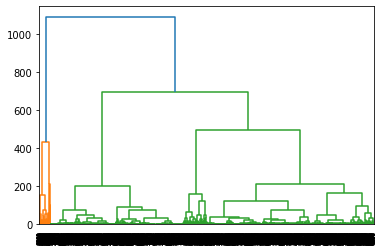

In [ ]:
'''Plot the dendrogram'''
dendrogram = sch.dendrogram(sch.linkage(X2, method='ward', metric='euclidean'))
plt.show()

In [ ]:
'''Implement agglomerative clustering algorithms to cluster the given data for
different distance metrics (Euclidean, Manhattan, Cosine, L1, L2) and linkage
functions (single, complete, average, wards)'''
Agglo = AgglomerativeClustering(n_clusters = 3, affinity = 'l2', linkage = 'average')
Agglo.fit(X2)
labels = Agglo.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
#a list is created along with the cluster 
x3 = list(range(1,7306))
df3 = pd.DataFrame(Agglo.labels_,columns = ['Cluster'])
df3.insert(0, 'No', x3)
df3

,No,Cluster
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
7300,7301,0
7301,7302,0
7302,7303,0
7303,7304,0


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


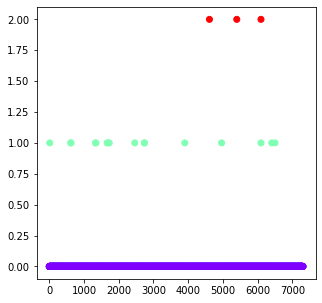

In [ ]:
plt.figure(figsize = (5,5))
plt.scatter(df3['No'], df3['Cluster'], c = Agglo.fit_predict(X2),cmap='rainbow')
plt.show()

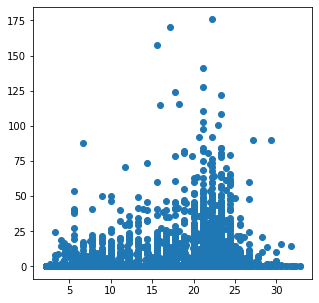

In [ ]:
#sctterplot for data without clustering
plt.figure(figsize = (5,5))
plt.scatter(X2['Tmin'],X2['Rainfall'],cmap='rainbow')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


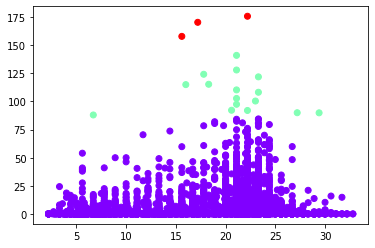

In [ ]:
#sctterplot for data with clustering
plt.scatter(X2['Tmin'], X2['Rainfall'], c = Agglo.fit_predict(X2), cmap='rainbow')

In [ ]:
#performance metrics
score = silhouette_score(X2, Agglo.labels_, metric='manhattan')
score

0.8682887006588884

In [ ]:
score = davies_bouldin_score(X2, Agglo.labels_)
score

0.30490352461849324